In [48]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

outliers = pd.read_csv('./outlier_골목상권.csv')

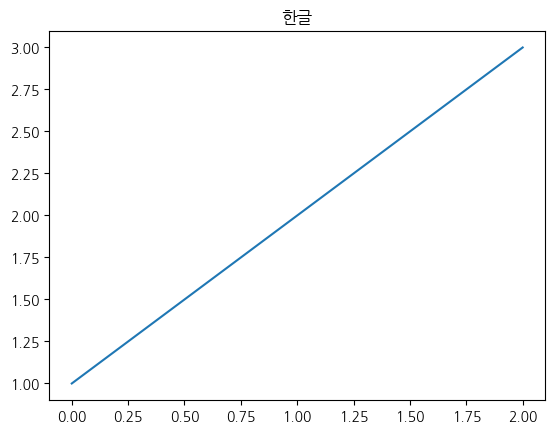

In [29]:
import matplotlib.pyplot as plt

# 한글 폰트 파일의 경로를 지정합니다.
font_path = './NanumGothic.ttf'  # 실제 폰트 파일의 경로로 바꿔주세요.

# 폰트 설정을 변경합니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 표시 설정

import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [49]:
out_count = pd.DataFrame(outliers['상권_코드'].value_counts()).reset_index()
out_count

,상권_코드,count
0,2110983,53
1,2110971,20
2,2110949,20
3,2110957,16
4,2110999,16
5,2110955,12
6,2110997,10
7,2110967,9
8,2110975,9
9,2110981,7


In [50]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   매출              179 non-null    float64
 1   기준_년_코드         179 non-null    int64  
 2   상권_구분_코드_명      179 non-null    object 
 3   상권_코드           179 non-null    int64  
 4   상권_코드_명         179 non-null    object 
 5   시간대1            179 non-null    int64  
 6   시간대2            179 non-null    int64  
 7   시간대3            179 non-null    int64  
 8   시간대4            179 non-null    int64  
 9   시간대5            179 non-null    int64  
 10  분기_1            179 non-null    int64  
 11  분기_2            179 non-null    int64  
 12  분기_3            179 non-null    int64  
 13  총 상주인구 수        179 non-null    int64  
 14  총 가구 수          179 non-null    int64  
 15  총_직장인구_수        179 non-null    int64  
 16  시간대_생활인구_수      179 non-null    int64  
 17  관공서_수           179 non-null    int

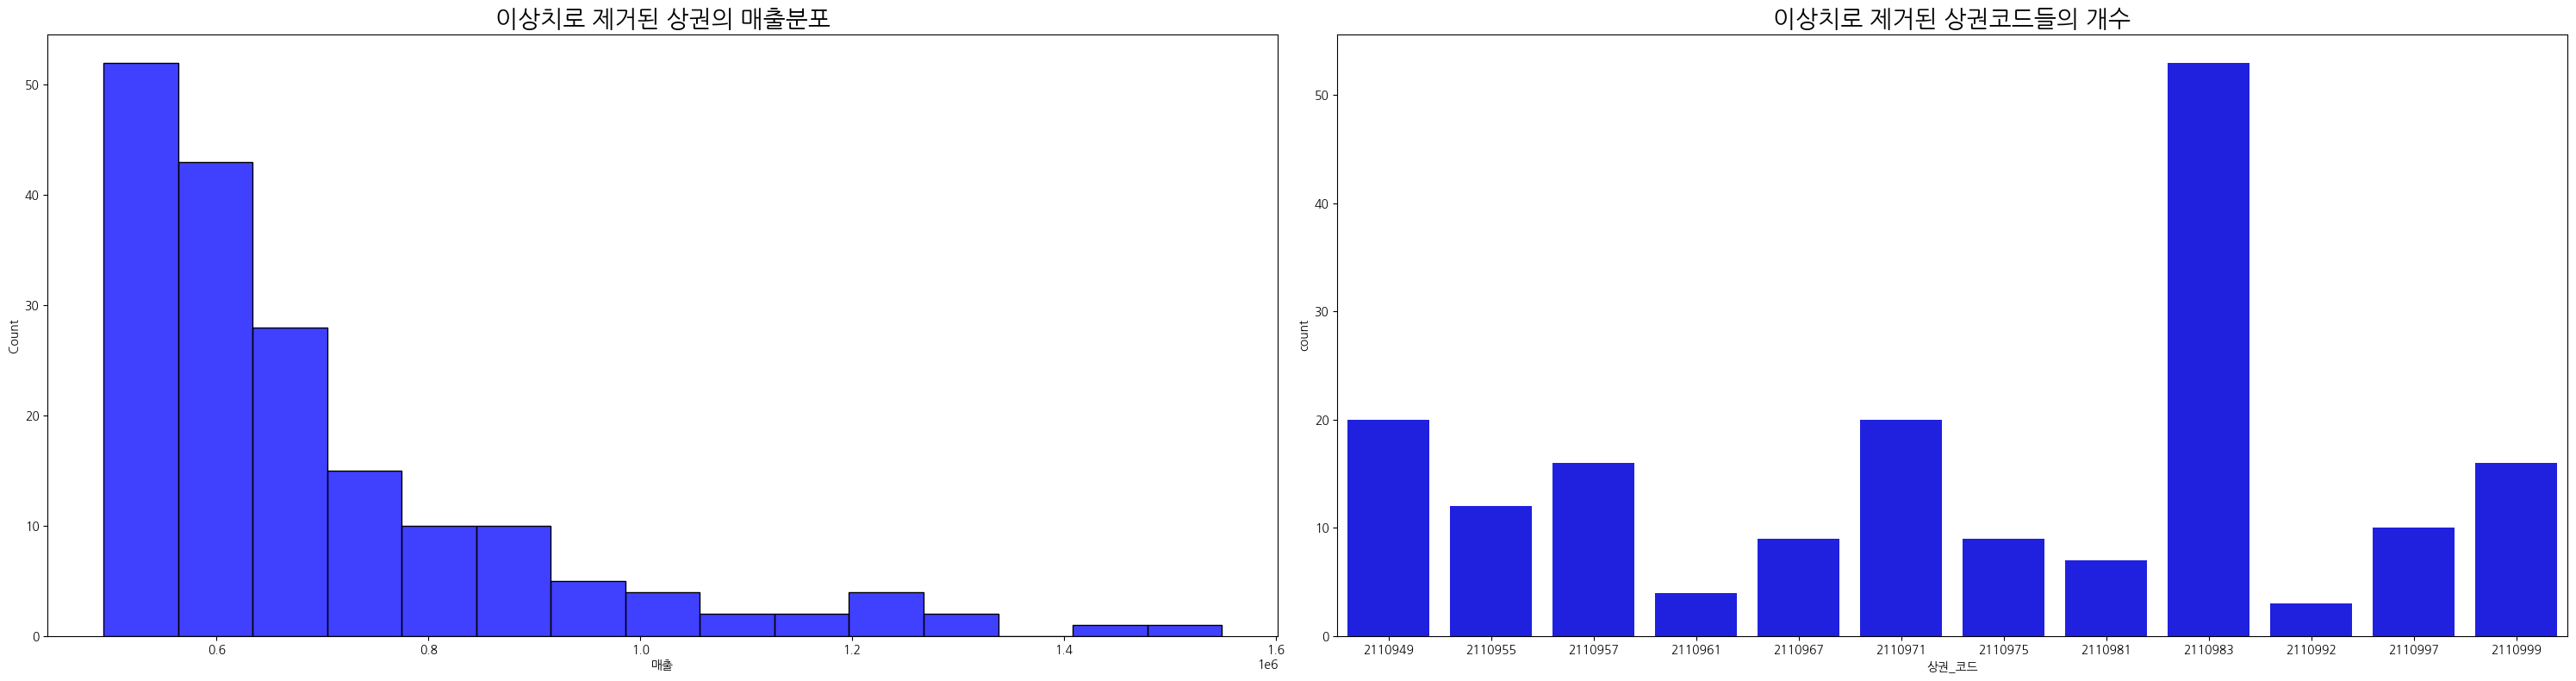

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (30, 8))

a = sns.histplot(outliers['매출'], color = 'b', ax = ax[0])
a.set_title('이상치로 제거된 상권의 매출분포', fontsize = 20)
b = sns.barplot(x = out_count['상권_코드'], y = out_count['count'], color = 'b', ax = ax[1])
b.set_title('이상치로 제거된 상권코드들의 개수', fontsize = 20)

plt.tight_layout()
plt.show()

In [52]:
merged = pd.merge(outliers, out_count, on = '상권_코드', how = 'left')
merged.head()

,매출,기준_년_코드,상권_구분_코드_명,상권_코드,상권_코드_명,시간대1,시간대2,시간대3,시간대4,시간대5,...,지하철역_수,평일_생활인구_평균,주말_생활인구_평균,상권내_총_아파트_세대_수,배후지_총_아파트_세대_수,면적당_버스정류장_수,면적당_점포_수,면적당_집객시설_수,직장인구/상주인구,count
0,596860.1749,2022,골목상권,2110955,논현초등학교,1,0,0,0,0,...,0,430978.2,400407.5,2138,2863.465550,0.000000,0.628562,0.628562,0.483848,12
1,780426.3007,2022,골목상권,2110957,언북중학교,1,0,0,0,0,...,0,153791.6,95044.5,532,2862.413505,0.000000,0.316406,0.738280,0.710392,16
2,526631.5679,2022,골목상권,2110967,역삼역 8번,1,0,0,0,0,...,0,98422.2,71085.5,404,2862.828427,0.000000,0.582488,0.436866,0.294762,9
3,582601.6621,2022,골목상권,2110955,논현초등학교,1,0,0,0,0,...,0,421422.2,381863.5,2138,2861.961761,0.000000,0.628562,0.628562,0.483848,12
4,603875.8239,2022,골목상권,2110999,윗방죽마을공원,1,0,0,0,0,...,0,10306.8,9907.5,17,2860.164072,0.166808,0.208511,0.417021,0.084356,16


In [53]:
merged = merged[['매출', '상권_코드', 'count']]

In [54]:
merged

,매출,상권_코드,count
0,596860.1749,2110955,12
1,780426.3007,2110957,16
2,526631.5679,2110967,9
3,582601.6621,2110955,12
4,603875.8239,2110999,16
...,...,...,...
174,549307.2971,2110949,20
175,826044.0478,2110997,10
176,736863.2971,2110983,53
177,660804.9002,2110955,12


In [83]:
merged = merged.groupby('상권_코드').agg({'매출': 'mean', 'count': 'max'}).reset_index()
merged

,상권_코드,매출,count
0,2110949,640403.991145,20
1,2110955,691169.909100,12
2,2110957,650508.978381,16
3,2110961,526416.430250,4
4,2110967,652814.424667,9
5,2110971,594451.796870,20
6,2110975,544737.816733,9
7,2110981,611852.409829,7
8,2110983,752620.749615,53
9,2110992,528415.659100,3


In [84]:
merged['상권_코드'] = merged['상권_코드'].astype(str)
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상권_코드   12 non-null     object 
 1   매출      12 non-null     float64
 2   count   12 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 416.0+ bytes


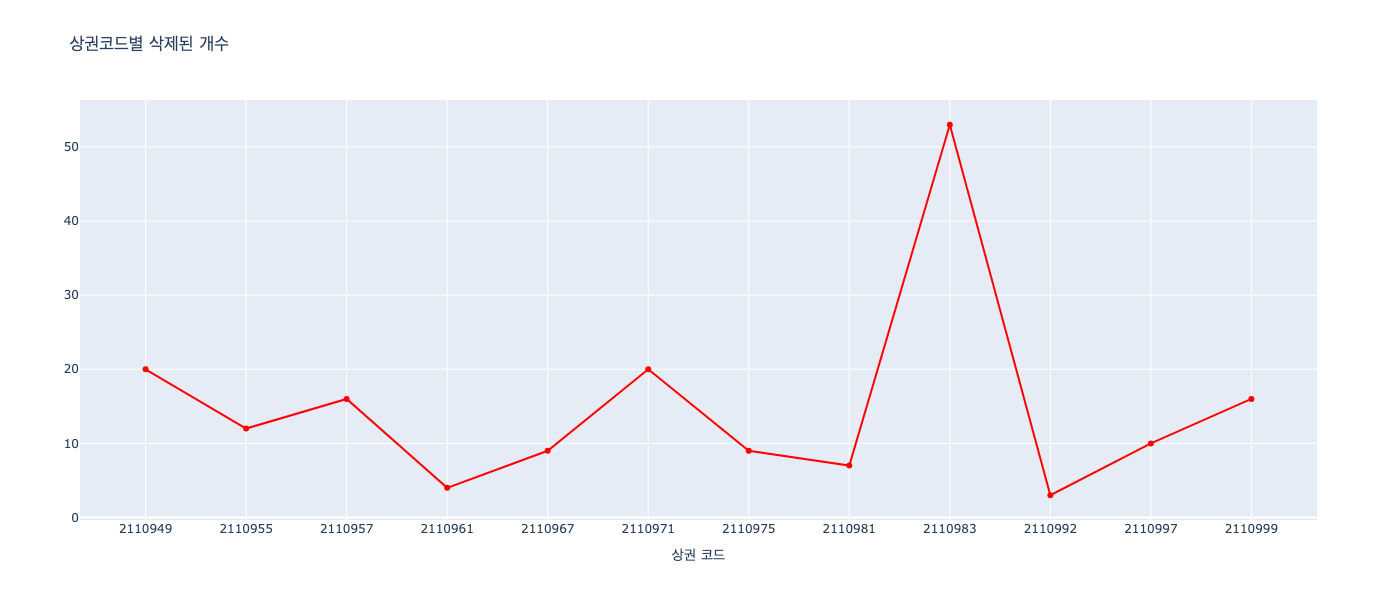

In [103]:
fig = go.Figure()

# count 최댓값을 선 그래프로 추가
fig.add_trace(go.Scatter(x=merged['상권_코드'], y=merged['count'], mode='lines+markers', name='제거된 상권 개수', line=dict(color='red'), yaxis='y2'))

# 그래프 레이아웃 설정
fig.update_layout(title='상권코드별 삭제된 개수',
                  xaxis_title='상권 코드',
                  yaxis_title='값',
                  height=600)


# 그래프 표시
fig.show()


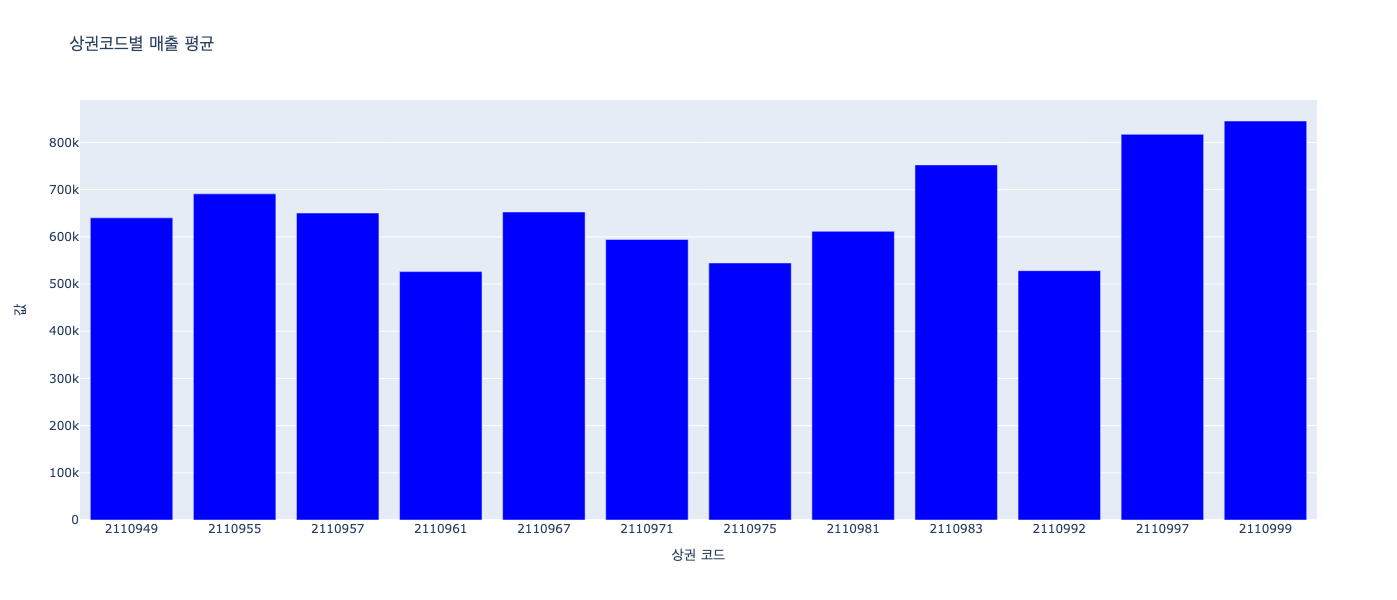

In [102]:
fig = go.Figure()

# 매출 평균을 막대 그래프로 추가
fig.add_trace(go.Bar(x=merged['상권_코드'], y=merged['매출'], name='제거된 상권의 평균매출', marker_color='blue', yaxis='y'))

# 그래프 레이아웃 설정
fig.update_layout(title='상권코드별 매출 평균',
                  xaxis_title='상권 코드',
                  yaxis_title='값',
                  height=600)



# 그래프 표시
fig.show()
